## Group 55 - Assignment 2 - Problem 3

<div class="alert alert-block alert-info">
<b>Note:</b>This same notebook serves as our report. Proper comments and explanations with visualizations were prodcued where and when needed. A pdf is also provided along with this notebook.
</div>

***
### Designing a Radial Basis Function (RBF) Network
***

### 1. Designing a RBF network based on 
- Gaussian kernel functions with constant spread function 
- Using all the points in the training set as centers of the RB functions


In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.linalg import norm, pinv
import matplotlib.pyplot as plt
from IPython.display import Image

##### Dataset Creation

In [2]:
#Considering a training dataset of 441 randomly sampled data points as per the definition given in the assignment

x_data =[]
for i in range(0,21):
    for j in range(0,21):
        [x,y]=round(-2+0.2*i,1),round(-2+0.2*j,1)
        x_data.append([x,y])
        
random.shuffle(x_data)
arr = np.array(x_data)

y_data =[]
for i in x_data:
    y1,y2=i
    if pow(y1,2)+pow(y2,2) > 1:
        y=-1
    else:
        y=1

    y_data.append(y)
    
arr_class = np.array(y_data)

x_train, x_test, y_train, y_test = train_test_split(arr, arr_class, test_size = 0.2, random_state = 275)

##### RBF Network Design Implementation

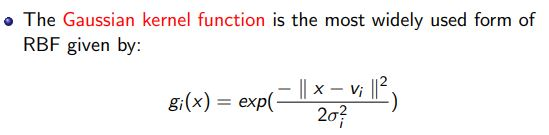

In [4]:
Image("GKF.jpg",width=600,height=600)

*Image source:* Referred from Set 3 of the lecture document

This same formula is represented programmatically as below `gauss_matrix` function.

In [3]:
#The inputs to the function "gauss_matrix" are input data, centers of the RB functions and spread parameter sigma.
#The gaussian matrix is calculated which will be of size N*C where N is the number of samples and C is the number of centers.

def gauss_matrix(x_train,c_data,sigma):
    gaussian_matrix=np.zeros((x_train.shape[0],c_data.shape[0]),float)
    for center_index, centre in enumerate(c_data):
        for train_index, train_data in enumerate(x_train):
            dis = norm(train_data-centre)**2
            z=np.exp(-dis/(2*(sigma **2)))
            gaussian_matrix[train_index,center_index]=z
            
    return gaussian_matrix

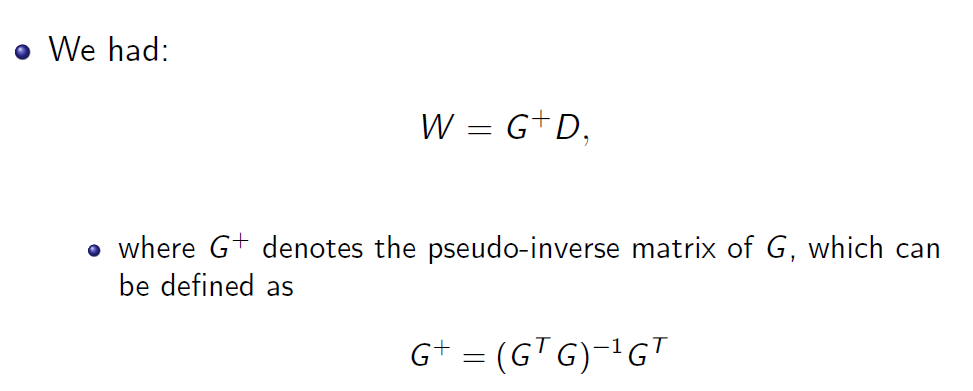

In [5]:
Image("Weight.PNG",width=600,height=600)

*Image source:* Referred from Set 3 of the lecture document

The above formulas are used for the implementation of weight matrix in the `weight_calculation` function.

In [5]:
#Weights are calculated by the dot product of the desired output (D) and the pseudo inverse of gaussian matrix (G+)

#The inputs to the function "weight_calculation" are input data, centers of the RB functions, spread parameter sigma and 
#-desired output. Weights of the network are calculated here.


def weight_calculation(x_train,c_data,sigma,y_train):    
    matrix_data=gauss_matrix(x_train,c_data,sigma)
    weights=np.dot(pinv(matrix_data),y_train)  
    return weights

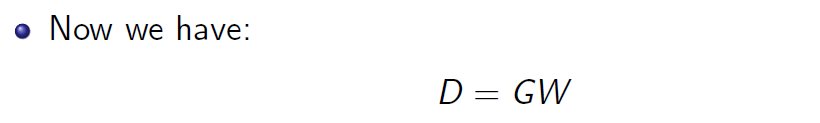

In [7]:
Image("Output_1.PNG",width=600,height=600)

*Image source:* Referred from Set 3 of the lecture document

Output of the network is calculated by the dot product of the gaussian matrix (G) and the calculated weights (W) and is implemeted with the below function `output_calculation`.

In [7]:
#The inputs to the function "output_calculation" are input data, centers of the RB functions, spread parameter sigma and 
#-calculated weights.

def output_calculation(x_train,c_data,sigma,weights):       
    test_gauss_matrix= gauss_matrix(x_train,c_data,sigma)
    output= np.dot(test_gauss_matrix,weights)
    return output

In [11]:
sigma_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,14,16]
accuracy=[]
error=[]
for i in sigma_values: 
    weights= weight_calculation(x_train,x_train,i,y_train)
    y_output= output_calculation(x_test,x_train,i,weights)
    y_pred= np.sign(y_output)
    acc = np.mean(y_test == y_pred)
    accuracy.append(acc)
    err=np.square(y_test - y_pred).mean()
    error.append(err)
    
df_acc= pd.DataFrame(accuracy,sigma_values)
df_error= pd.DataFrame(error,sigma_values)
d = {'Sigma':sigma_values, 'MSE': error,'Accuracy':accuracy}
df_error_acc = pd.DataFrame(d)

**Mean Square Error and Accuracy for a given Sigma are as below**

In [12]:
df_error_acc

,Sigma,MSE,Accuracy
0,0.1,0.179775,0.955056
1,0.2,0.179775,0.955056
2,0.3,0.494382,0.876404
3,0.4,0.898876,0.775281
4,0.5,1.078652,0.730337
5,0.6,0.404494,0.898876
6,0.7,0.179775,0.955056
7,0.8,0.134831,0.966292
8,0.9,0.089888,0.977528
9,1.0,0.089888,0.977528


**Plotting MSE and Accuracy varying Spread parameter(Sigma)**

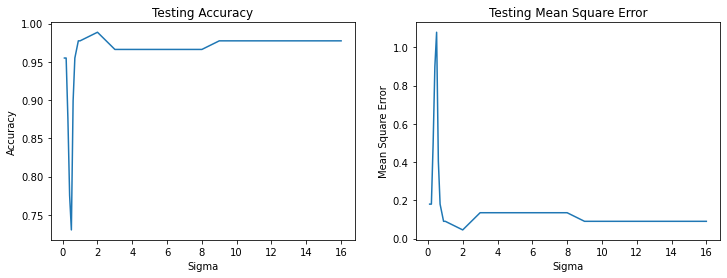

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(sigma_values, accuracy)
plt.title("Testing Accuracy")
plt.xlabel('Sigma');
plt.ylabel('Accuracy');

#plt.xticks(sigma_values)

plt.subplot(1, 2, 2)
plt.plot(sigma_values, error)
plt.title("Testing Mean Square Error")
plt.xlabel('Sigma');
plt.ylabel('Mean Square Error');

#plt.xticks(sigma_values)

plt.show()

***
### Summary

**Background:**
>Radial Basis Function Network is a special category of hybrid feed forward network. The reason why it is called a shybrid is it usesunsupervised methods like K-Means, MLE, SOM to find the centres, widths of radial basis functions and supervised methods to adapt weights. This RBF network consists of only one hidden layer and this layer have units with radial basis functions in them. This is mainly used to transform non linearly separable data into a higher dimensional space where the data is linearly separable.<br>
<br>

**Observations:**
>For the network, we have varied the value of sigma [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,14,16] and have considered all the data points as centers.<br>
<br>
>From the plot between Testing Accuracy and Sigma, we notice that the accuracy started decreasing with the increase in the value of sigma (0.3,0.4), reached the lowest for sigma as 0.5. After reaching the lowest value, it increased with the increase in sigma (0.6,0.7,0.8,0.9,1) and reached the highest of 98.87% for sigma values of 2 and then fluctuated below the highest value for the remaining values.<br>
<br>
>From the plot between Mean Square Error and Sigma, we notice that the error started increasing with the increase in the value of sigma (0.3,0.4), reached the highest for sigma as 0.5. After reaching the highest value, it decreased with the increase in sigma (0.6,0.7,0.8,0.9,1) and reached the lowest of 0.044 for sigma values of 2 and then fluctuated above the lowest value for the remaining values.<br>
<br>
>Smaller values of width doesn't seem to provide a good interpolation of function and larger width value, though it performs well, there could be loss of information when the ranges of the radial functions are further away from the original range of the function. Hence, we have chosen the value of sigma as 2 as it gave us the accuracy of 98.87% and better mean square error. 

***
### 2. Designing a RBF network
- using this time only 150 centers
- choosing the centers randomly and using K-Means algorithm

#### a) Randomly select the centers from the input data.

In [11]:
train_x_list = x_train.tolist()
centres_ran = random.sample(train_x_list,150)
arr_centres_ran = np.array(centres_ran)
weights_150= weight_calculation(x_train,arr_centres_ran,2,y_train) #considering the value of sigma as "2"
y_output_150= output_calculation(x_test,arr_centres_ran,2,weights_150)
y_pred_150= np.sign(y_output_150)
err_150=np.square(y_test - y_pred_150).mean()
acc_150 = round(np.mean(y_test == y_pred_150),4)

print("Considering 150 random centres, the Mean Square Error for sigma value 2 is {} and Accuracy is {} ".format(err_150,acc_150))

Considering 150 random centres, the Mean Square Error for sigma value 2 is 0.1797752808988764 and Accuracy is 0.9551 


#### b) Use K-Means algorithm to find the centers.

In [14]:
kmeans = KMeans(n_clusters=150, random_state=275).fit(x_train)
centres_ran_k = kmeans.cluster_centers_
arr_centres_k = np.array(centres_ran_k)

weights_150_k= weight_calculation(x_train,arr_centres_k,2,y_train) #considering the value of sigma as "2"
y_output_150_k= output_calculation(x_test,arr_centres_k,2,weights_150_k)
y_pred_150_k= np.sign(y_output_150_k)
err_150_k=np.square(y_test - y_pred_150_k).mean()
acc_150_k= round(np.mean(y_test == y_pred_150_k),4)

print("Considering 150 K Means centres, the Mean Square Error for sigma value 2 is {} and Accuracy is {} ".format(err_150_k,acc_150_k))

Considering 150 K Means centres, the Mean Square Error for sigma value 2 is 0.0449438202247191 and Accuracy is 0.9888 


***
### Summary

>The second RBF network was designed by using only 150 centres instead of all the data points. These centres are chosen in two ways<br>
>a)chosen randmoly<br>
>b)using K-Means algorithm<br>
>
>K-Means from Scikit-learn was used. The spread parameter is fixed for all kernel functions, value being 2 which gave an accuracy of 98.8% in the first network implementation. 

### Comparison

>*The results are obtained with the `test set` which is `20%` of the total dataset.*<br>
<br>
> Results of RBF network when **all data points** were chosen as centers and when **only 150 centers chosen randomly**. <br>
<br>
>- The accuracy obtained when all the data points were chosen as centers was 98.8% at a sigma value 2; Accuracy obtained when 150 centers chosen at random was 95.51% at the same sigma value 2. 
>- Mean square error too is more, 0.179 for 150 centers and 0.044 for all the 352 data points. 
>- In this case, chosing random centres - units at hidden layer which are less in number than the total data points did not perform well. This shows the number of units in the hidden layer must be equal or greater than the number of data points for a better performance.
><br>
>
> Results of RBF network when **all data points** were chosen as centers and when **only 150 centers obtained with K-Means**. <br>
<br>
>- Accuracy with 150 centers obtained from K-Means algorithm was 98.8% for a sigma value 2 is same as the accuracy obtained with all data points. 
>- Here K-Means performed well in identifying the proper centers as the accuracy increased when compared to selecting centers randomly. 
>- Mean Square Error has also been reduced. 
>- Though the number of units in the hidden layer are less compared to input data points, this network design has produced equally good results as with network with all data points as centers.